In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

## Using Teach Spin Apparatus

#### Double and Single Slit (Laser)

In [141]:
double_slit_data = pd.read_csv("double_slit.txt", sep="\t", header=None)
single_slit_right = pd.read_csv("right_single_slit.txt", sep="\t", header=None)
single_slit_left = pd.read_csv("left_single_slit.txt", sep="\t", header=None)

In [142]:
def moving_average(data, window_size):
    if not isinstance(window_size, int) or window_size <= 0:
        raise ValueError("window_size should be a positive integer")
    
    kernel = np.ones(window_size) / window_size
    smoothed_data = np.convolve(data, kernel, mode='same')
    
    return smoothed_data

def position(time):
    vel_1 = 10/158.07
    vel_2 = 10/154.85
    avg_vel = 1/2*(vel_1 + vel_2)
    return avg_vel*time

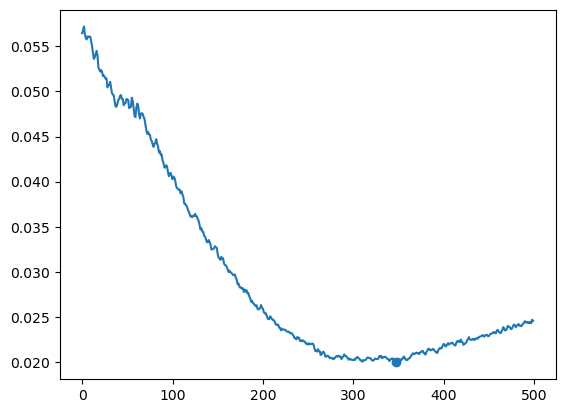

In [165]:
nums = single_right_data_voltage_smooth[2200:][:500]
min_num = nums[0]
min_index = 0
for i, n in enumerate(nums):
    if n < min_num:
        min_num = n
        min_index=i
    else:
        continue
plt.plot(nums)
plt.scatter(min_index, min_num)

2175


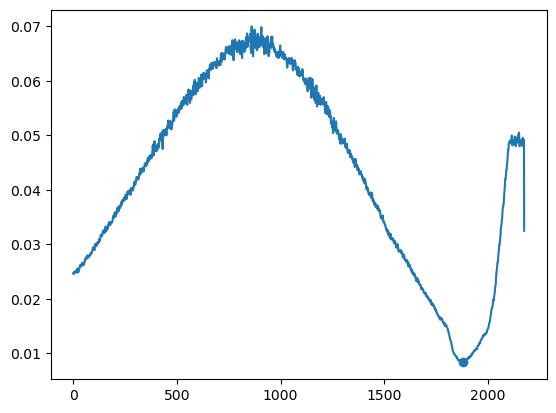

In [181]:
nums_2 = single_right_data_voltage_smooth[2200:][500:]
print(len(nums_2))
max_num_2 = nums_2[0]
max_index_2 = 0
for i, n in enumerate(nums_2):
    if n < max_num:
        max_num = n
        max_index=i
    else:
        continue
plt.plot(nums_2)
plt.scatter(max_index, max_num)

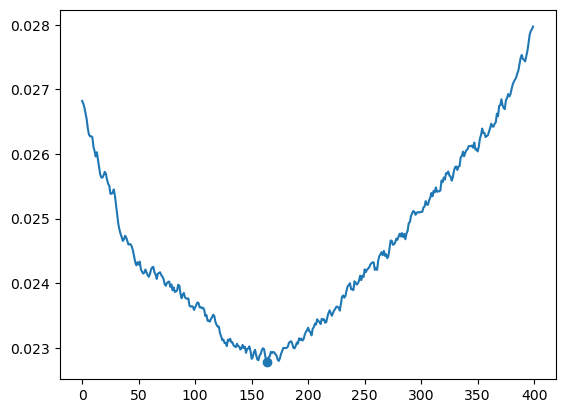

In [183]:
nums_2 =  single_left_data_voltage_smooth[100:500]
min_num_2 = nums_2[0]
min_index_2 = 0
for i, n in enumerate(nums_2):
    if n < max_num_2:
        max_num_2 = n
        max_index_2=i
    else:
        continue
plt.plot(nums_2)
plt.scatter(max_index_2, max_num_2)

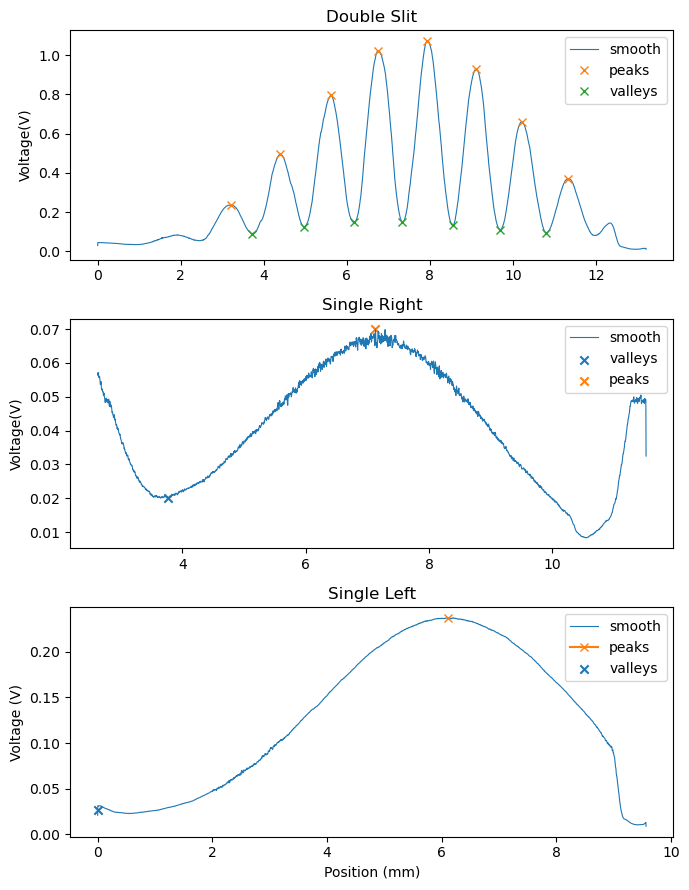

In [350]:
double_slit_data_position, double_slit_data_voltage = double_slit_data[0].to_numpy(), double_slit_data[1].to_numpy()
single_right_data_position, single_right_data_voltage = single_slit_right[0].to_numpy(), single_slit_right[1].to_numpy()
single_left_data_position, single_left_data_voltage = single_slit_left[0].to_numpy(), single_slit_left[1].to_numpy()

double_slit_data_voltage_smooth = moving_average(double_slit_data_voltage, 3)
single_right_data_voltage_smooth = moving_average(single_right_data_voltage, 3)
single_left_data_voltage_smooth = moving_average(single_left_data_voltage, 3)

prominence_value = 0.1  # Adjust this value based on your data
distance_value = 20     # Adjust this based on approximate expected spacing

# For double slit data
peaks_double, _ = find_peaks(double_slit_data_voltage_smooth, prominence=prominence_value, distance=distance_value)
valleys_double, _ = find_peaks(-double_slit_data_voltage_smooth, prominence=prominence_value, distance=distance_value)

# For single right data
peaks_single_right, _ = find_peaks(single_right_data_voltage_smooth[2200:], prominence=prominence_value, distance=distance_value)
valleys_single_right, _ = find_peaks(-single_right_data_voltage_smooth[2200:], prominence=prominence_value, distance=distance_value)

# For single left data
peaks_single_left, _ = find_peaks(single_left_data_voltage_smooth, prominence=prominence_value, distance=distance_value)
valleys_single_left, _ = find_peaks(-single_left_data_voltage_smooth, prominence=prominence_value, distance=distance_value)

# Plotting

plt.figure(figsize=(7, 9))

# Double Slit
plt.subplot(311)
plt.plot(position(double_slit_data_position), double_slit_data_voltage_smooth, lw=.8, label="smooth")
plt.plot(position(double_slit_data_position)[peaks_double], double_slit_data_voltage_smooth[peaks_double], "x", label="peaks")
plt.plot(position(double_slit_data_position)[valleys_double], double_slit_data_voltage_smooth[valleys_double], "x", label="valleys")
plt.title('Double Slit')
plt.ylabel('Voltage(V)')
plt.legend()

# Single Right
plt.subplot(312)
plt.plot(position(single_right_data_position[2200:]), single_right_data_voltage_smooth[2200:], lw=.8, label="smooth")
plt.scatter(position(single_right_data_position[2200:])[min_index], min_num, marker="x", label="valleys")
plt.scatter(position(single_right_data_position[2200:])[max_index], max_num, marker="x", label="peaks")
plt.legend()
plt.title('Single Right')
plt.ylabel('Voltage(V)')
plt.legend()

# Single Left
plt.subplot(313)
plt.plot(position(single_left_data_position), single_left_data_voltage_smooth, lw=.8, label="smooth")
plt.plot(position(single_left_data_position)[peaks_single_left], single_left_data_voltage_smooth[peaks_single_left], marker="x", label="peaks")
plt.scatter(position(single_left_data_position)[min_index_2], min_num_2, marker="x", label="valleys")
plt.title('Single Left')
plt.xlabel('Position (mm)')
plt.ylabel('Voltage (V)')
plt.legend()

plt.tight_layout()  # Adjusts subplots for better layout
plt.show()

In [342]:
diffs_4=[]
for i in range(len(position(double_slit_data_position[peaks_double][:-1]))):
    diff = np.abs(position(double_slit_data_position)[peaks_double][:-1][i] -  position(double_slit_data_position)[valleys_double][i])
    diffs_4.append(diff)
print(np.average(np.array(diffs_4)))
print(np.average(np.array(diffs_4))*(1/1000))

0.5680728068571901
0.0005680728068571901


In [395]:
#print(position(double_slit_data_position[peaks_double]))
diffs_9 = []
for i in range(len(position(double_slit_data_position[peaks_double]))):
    if i != len(position(double_slit_data_position[peaks_double])) - 1:
        diff = position(double_slit_data_position[peaks_double])[i+1] - position(double_slit_data_position[peaks_double])[i]
        diffs_9.append(diff)
print(diffs_9)
diffs_9 = np.array(diffs_9)
print(np.average(diffs_9)*(1/1000))

[1.1927738136966535, 1.2148302205247479, 1.1449235468956651, 1.1850959586515408, 1.178135103981412, 1.098278444137641, 1.1043431921609947]
0.001159768611435522


In [345]:
diffs_5 = position(single_right_data_position[2200:])[min_index] - position(single_right_data_position[2200:])[max_index]
print(np.abs(diffs_5))
print(np.average(np.array(np.abs(diffs_5))*(1/1000)))

3.364553823006974
0.003364553823006974


In [346]:
diffs_6 = position(single_left_data_position)[peaks_single_left] - position(single_left_data_position)[min_index_2]
print(np.abs(diffs_6))
print(np.average(np.array(diffs_6))*(1/1000))

[6.11472705]
0.0061147270468185225


#### Double and Single Slit Bulb

In [133]:
double_slit_bulb = pd.read_csv("double_slit_bulb.txt", sep="\t", header=None)
single_slit_right_bulb = pd.read_csv("right_bulb.txt", sep="\t", header=None)
single_slit_left_bulb = pd.read_csv("left_bulb.txt", sep="\t", header=None)

In [134]:
double_slit_bulb_position, double_slit_bulb_voltage = double_slit_bulb[0].to_numpy(), double_slit_bulb[2].to_numpy()
single_right_bulb_position, single_right_bulb_voltage = single_slit_right_bulb[0].to_numpy(), single_slit_right_bulb[2].to_numpy()
single_left_bulb_position, single_left_bulb_voltage = single_slit_left_bulb[0].to_numpy(), single_slit_left_bulb[2].to_numpy()

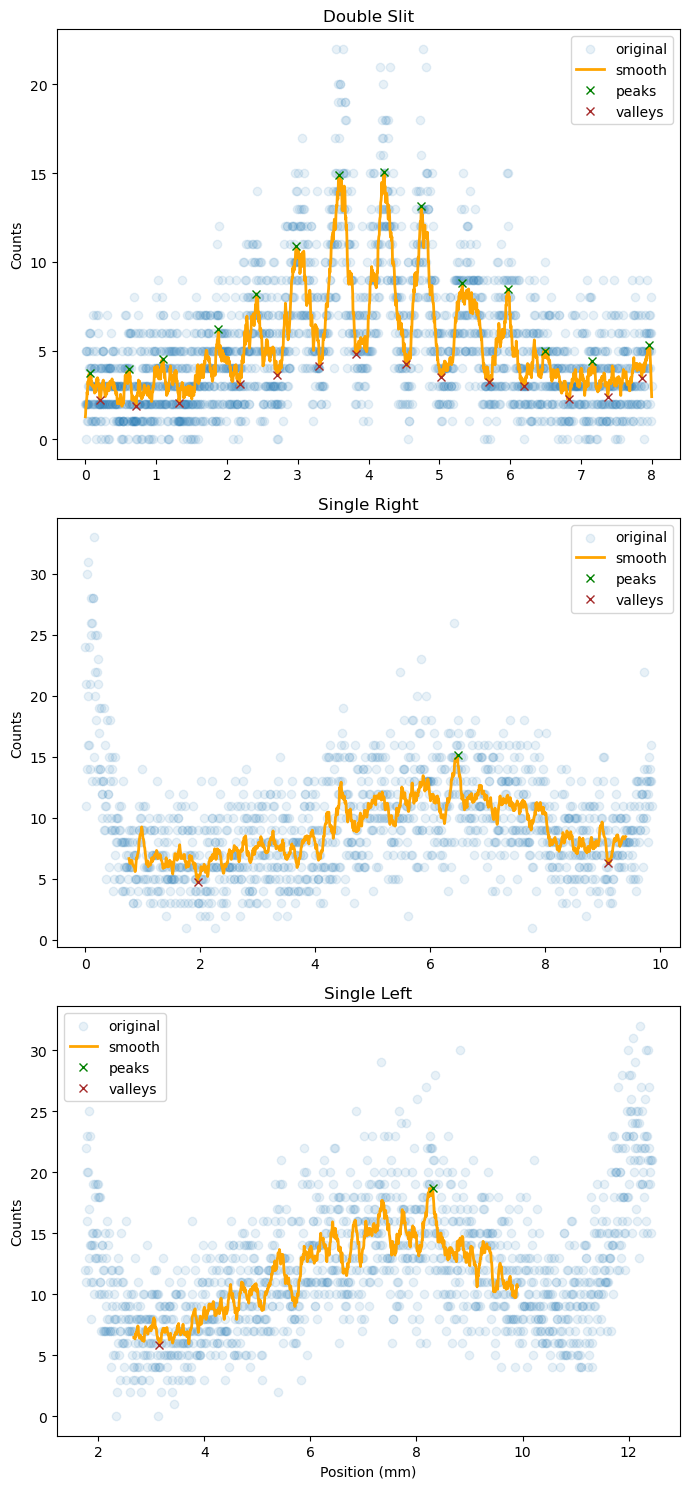

In [388]:
double_slit_bulb_voltage_smooth = moving_average(double_slit_bulb_voltage, 15)
single_right_bulb_voltage_smooth = moving_average(single_right_bulb_voltage, 15)
single_left_bulb_voltage_smooth = moving_average(single_left_bulb_voltage, 15)

plt.figure(figsize=(7, 15))

prominence_value = 0.2  # Adjust this value based on your data
distance_value = 130  

distance_value_2 = 800 
distance_value_3 = 1500 

# For double slit data
peaks_double_1, _ = find_peaks(double_slit_bulb_voltage_smooth, prominence=prominence_value, distance=distance_value)
valleys_double_1, _ = find_peaks(-double_slit_bulb_voltage_smooth, prominence=prominence_value, distance=distance_value)

# For single right data
peaks_single_right_1, _ = find_peaks(single_right_bulb_voltage_smooth[100:1240], prominence=prominence_value, distance=distance_value_2)
valleys_single_right_1, _ = find_peaks(-single_right_bulb_voltage_smooth[100:1240], prominence=prominence_value, distance=distance_value_2)

# For single left data
peaks_single_left_1, _ = find_peaks(single_left_bulb_voltage_smooth[350:1300], prominence=prominence_value, distance=distance_value_3)
valleys_single_left_1, _ = find_peaks(-single_left_bulb_voltage_smooth[350:1300], prominence=prominence_value, distance=distance_value_3)

plt.subplot(311)  
plt.scatter(position(double_slit_bulb_position), double_slit_bulb_voltage, label="original", alpha=.1)
plt.plot(position(double_slit_bulb_position), double_slit_bulb_voltage_smooth, lw=2, label="smooth", color="orange")
plt.plot(position(double_slit_bulb_position)[peaks_double_1], double_slit_bulb_voltage_smooth[peaks_double_1], "x", label="peaks", color="green")
plt.plot(position(double_slit_bulb_position)[valleys_double_1], double_slit_bulb_voltage_smooth[valleys_double_1], "x",label="valleys", color="brown")
plt.title('Double Slit')
plt.ylabel('Counts')
plt.legend()

plt.subplot(312)  
plt.scatter(position(single_right_bulb_position[:1300]), single_right_bulb_voltage[:1300],label="original", alpha=.1)
plt.plot(position(single_right_bulb_position[100:1240]), single_right_bulb_voltage_smooth[100:1240], lw=2, label="smooth", color="orange")
plt.plot(position(single_right_bulb_position[100:1240])[peaks_single_right_1], single_right_bulb_voltage_smooth[100:1240][peaks_single_right_1], "x", label="peaks", color="green")
plt.plot(position(single_right_bulb_position[100:1240])[valleys_single_right_1], single_right_bulb_voltage_smooth[100:1240][valleys_single_right_1], "x",label="valleys", color="brown")
#plt.plot(position(single_right_bulb_position[100:1240])[valleys_single_right_1], single_right_bulb_voltage_smooth[100:1240][valleys_single_right_1], "x", label="valleys", color="black")
plt.title('Single Right')
plt.ylabel('Counts')
plt.legend()

plt.subplot(313) 
plt.scatter(position(single_left_bulb_position[230:]), single_left_bulb_voltage[230:], label="original", alpha=.1)
plt.plot(position(single_left_bulb_position[350:1300]), single_left_bulb_voltage_smooth[350:1300], lw=2, label="smooth", color="orange")
plt.plot(position(single_left_bulb_position[350:1300])[peaks_single_left_1], single_left_bulb_voltage_smooth[350:1300][peaks_single_left_1], "x", label="peaks", color="green")
plt.plot(position(single_left_bulb_position[350:1300])[valleys_single_left_1], single_left_bulb_voltage_smooth[350:1300][valleys_single_left_1], "x", label="valleys", color="brown")
plt.title('Single Left')
plt.xlabel('Position (mm)')
plt.ylabel('Counts')
plt.legend()
plt.tight_layout()  # Adjusts subplots for better layout
plt.show()

In [339]:
diffs=[]
for i in range(len(position(double_slit_bulb_position[peaks_double_1]))):
    diff = np.abs(position(double_slit_bulb_position)[peaks_double_1][i] -  position(double_slit_bulb_position)[valleys_double_1][i])
    diffs.append(diff)
print(np.average(np.array(diffs)))
print(np.average(np.array(diffs))*(1/1000))

0.24861324823515438
0.0002486132482351544


In [399]:
#print(position(double_slit_data_position[peaks_double]))
diffs_10 = []
for i in range(len(position(double_slit_bulb_position[peaks_double_1]))):
    if i != len(position(double_slit_bulb_position[peaks_double_1])) - 1:
        diff = position(double_slit_bulb_position[peaks_double_1])[i+1] - position(double_slit_bulb_position[peaks_double_1])[i]
        diffs_10.append(diff)
print(diffs_10)
diffs_10 = np.array(diffs_10)
print(np.average(diffs_10)*(1/1000))

[0.5567758801145861, 0.4715496756064982, 0.7887776928100607, 0.5351541991089279, 0.5616037593445098, 0.6104936990615264, 0.6326288563988451, 0.5250272160110869, 0.5775135355174976, 0.6409731504124494, 0.5234192226587586, 0.6665331239297796, 0.811528919471983]
0.0006078445331112699


In [340]:
diffs_2=[]
for i in range(len(position(single_right_bulb_position[100:1240])[peaks_single_right_1])):
    diff = np.abs(position(single_right_bulb_position[100:1240])[peaks_single_right_1][i] -  position(single_right_bulb_position[100:1240])[valleys_single_right_1][:-1][i])
    diffs_2.append(diff)
print(np.average(np.array(diffs_2)))
print(np.average(np.array(diffs_2))*(1/1000))

4.523618327819721
0.004523618327819721


In [341]:
diffs_3=[]
for i in range(len(position(single_left_bulb_position[350:1300])[peaks_single_left_1])):
    diff = np.abs(position(single_left_bulb_position[350:1300][peaks_single_left_1][i] -  position(single_left_bulb_position[350:1300])[valleys_single_left_1][i]))
    diffs_3.append(diff)
print(np.average(np.array(diffs_3)))
print(np.average(np.array(diffs_3))*(1/1000))

8.1025339616405
0.0081025339616405


#### Pasco Data

In [84]:
data = pd.read_csv("DoubleSlitCircleHair.csv")
data.head()

,Time (s) Run #1,Light Intensity (% of scale max) Run #1,Relative Intensity Run #1,Angle (rad) Run #1,Angular Velocity (rad/s) Run #1,Angular Acceleration (rad/s²) Run #1,Position (m) Run #1,Velocity (m/s) Run #1,Acceleration (m/s²) Run #1,Time (s) Run #2,...,Acceleration (m/s²) Run #5,Time (s) Run #6,Light Intensity (% of scale max) Run #6,Relative Intensity Run #6,Angle (rad) Run #6,Angular Velocity (rad/s) Run #6,Angular Acceleration (rad/s²) Run #6,Position (m) Run #6,Velocity (m/s) Run #6,Acceleration (m/s²) Run #6
0,0.00,0.2,0.23,0.0,NaN,NaN,0.0,NaN,NaN,0.00,...,NaN,0.00,0.3,0.26,0.0,NaN,NaN,0.0,NaN,NaN
1,0.05,0.2,0.23,0.0,0.0,NaN,0.0,0.0,NaN,0.05,...,NaN,0.05,0.3,0.26,0.0,0.0,NaN,0.0,0.0,NaN
2,0.10,0.2,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.10,...,0.0,0.10,0.3,0.26,0.0,0.0,0.0,0.0,0.0,0.0
3,0.15,0.2,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.15,...,0.0,0.15,0.3,0.26,0.0,0.0,0.0,0.0,0.0,0.0
4,0.20,0.2,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.20,...,0.0,0.20,0.3,0.26,0.0,0.0,0.0,0.0,0.0,0.0


#### Reverse Double Slit (Hair)

In [117]:
time = data["Position (m) Run #3"].to_numpy()
intensity = data["Light Intensity (% of scale max) Run #3"].to_numpy()
intensity_smooth = moving_average(intensity, 3)

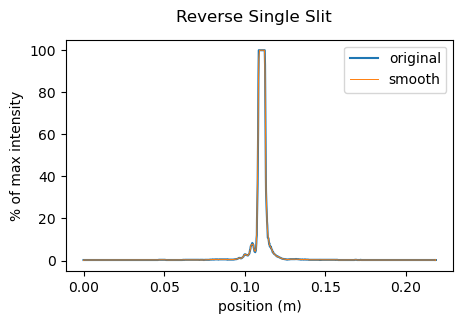

In [189]:
plt.figure(figsize=(5, 3))
plt.plot(time, intensity, lw=1.5, label="original")
plt.plot(time, intensity_smooth, lw=.7, label="smooth")
plt.xlabel("position (m)")
plt.ylabel("% of max intensity")
plt.legend()
plt.suptitle('Reverse Single Slit')
plt.show()

In [138]:
time_circular = data["Position (m) Run #6"].to_numpy()
intensity_circular = data["Light Intensity (% of scale max) Run #6"].to_numpy()
intensity_circular_smooth = moving_average(intensity_circular, 3)

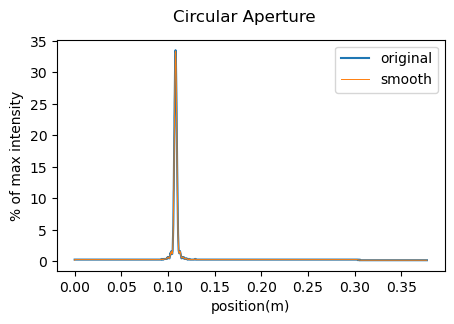

In [249]:
plt.figure(figsize=(5, 3))
plt.plot(time_circular, intensity_circular, lw=1.5, label="original")
plt.plot(time_circular, intensity_circular_smooth, lw=.7, label="smooth")
plt.xlabel("position(m)")
plt.ylabel("% of max intensity")
plt.legend()
plt.suptitle('Circular Aperture')
plt.show()

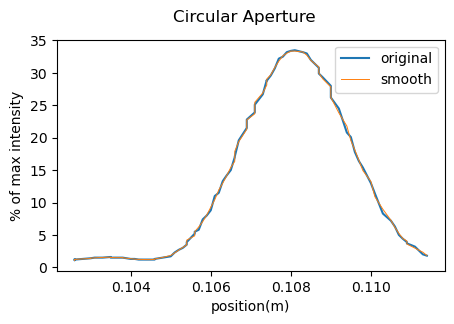

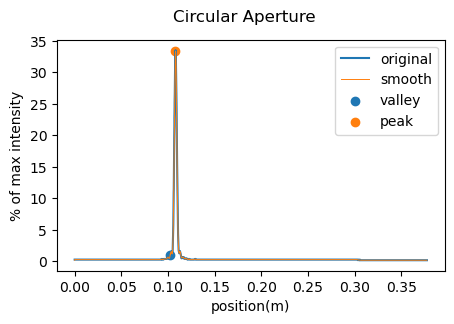

0.005400000000000002


In [337]:
plt.figure(figsize=(5, 3))
plt.plot(time_circular[700:800], intensity_circular[700:800], lw=1.5, label="original")
plt.plot(time_circular[700:800], intensity_circular_smooth[700:800], lw=.7, label="smooth")
plt.xlabel("position(m)")
plt.ylabel("% of max intensity")
plt.legend()
plt.suptitle('Circular Aperture')
plt.show()

nums = intensity_circular_smooth[700:800]
min_value = np.min(nums)
max_value = np.max(nums)
min_value_index = np.argmin(nums) + 700  # Adding 700 because we're offset by that amount
max_value_index = np.argmax(nums) + 700  # Adding 700 for the same reason

    
plt.figure(figsize=(5, 3))
plt.plot(time_circular, intensity_circular, lw=1.5, label="original")
plt.plot(time_circular, intensity_circular_smooth, lw=.7, label="smooth")
plt.scatter(time_circular[min_value_index], intensity_circular_smooth[min_value_index], label="valley")
plt.scatter(time_circular[max_value_index], intensity_circular_smooth[max_value_index], label="peak")
plt.xlabel("position(m)")
plt.ylabel("% of max intensity")
plt.legend()
plt.suptitle('Circular Aperture')
plt.show()

diff_7 = time_circular[max_value_index] - time_circular[min_value_index]
print(np.abs(diff_7))

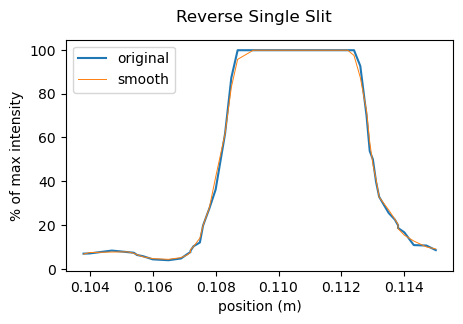

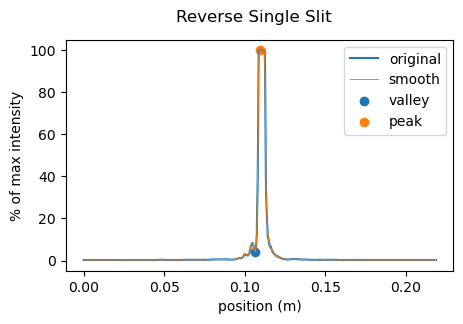

0.002700000000000008
95.8


In [400]:
plt.figure(figsize=(5, 3))
plt.plot(time[400:470], intensity[400:470], lw=1.5, label="original")
plt.plot(time[400:470], intensity_smooth[400:470], lw=.7, label="smooth")
plt.xlabel("position (m)")
plt.ylabel("% of max intensity")
plt.legend()
plt.suptitle('Reverse Single Slit')
plt.show()

nums_6 = intensity_smooth[400:470]
min_value_6 = np.min(nums_6)
max_value_6 = np.max(nums_6)
min_value_index_6 = np.argmin(nums_6) + 400  # Adding 400 because we're offset by that amount
max_value_index_6 = np.argmax(nums_6) + 400  # Adding 400 for the same reason

plt.figure(figsize=(5, 3))
plt.plot(time, intensity, lw=1.5, label="original")
plt.plot(time, intensity_smooth, lw=.7, label="smooth")
plt.scatter(time[min_value_index_6], intensity[min_value_index_6], label="valley")
plt.scatter(time[max_value_index_6 ], intensity[max_value_index_6 ], label="peak")
plt.xlabel("position (m)")
plt.ylabel("% of max intensity")
plt.legend()
plt.suptitle('Reverse Single Slit')
plt.show()

diff_8 =  time[max_value_index_6 ] - time[min_value_index_6]
diff_8_1 = intensity[max_value_index_6 ]-intensity[min_value_index_6]
print(np.abs(diff_8))
print(np.abs(diff_8_1))

In [368]:
a = ((.501)/(0.000568))*(1/2)*(670e-9)
print(a*1000)

0.29548415492957747


In [366]:
b = ((.501)/(0.00611))*(1)*(670e-9)
print(b*1000)

0.05493780687397709


In [365]:
0.000001 * 1000

0.001

In [367]:
0.0000005 * 1000

0.0005

In [369]:
0.0000054 * 1000

0.0054

In [371]:
(551 + 541) /2

546.0

In [374]:
a = ((.501)/(0.000249))*(1/2)*(546e-9)
print(a*1000)

0.5492891566265061


In [375]:
b = ((.501)/(0.00452))*(1)*(546e-9)
print(b*1000)

0.060519026548672576


In [383]:
c = ((.501)/(0.00810 ))*(1)*(546e-9)
print(c*1000)

0.03377111111111111


In [385]:
d = ((1.0512)/(0.00270))*(1/2)*(650e-9)
print(d*1000)

0.1265333333333333
